# Normality Tests

### Before testing: just look  

Draw a Q-Q plot, if it obviously deviates from the line (especially in the middle), then it's not normally distributed

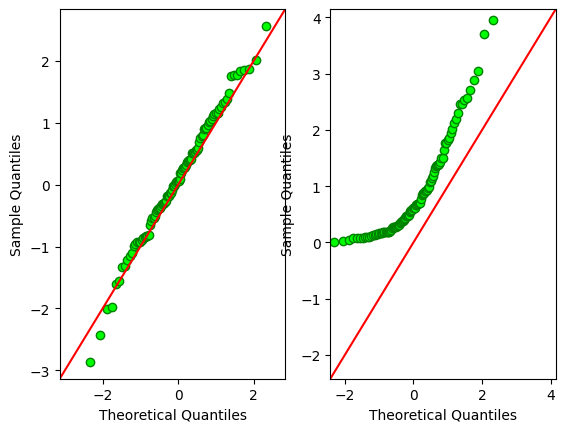

In [1]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
np.random.seed(173)
  
norm_data = np.random.normal(0, 1, 100)
not_norm_data = np.random.exponential(1, 100)

fig, ax = plt.subplots(1, 2)
sm.qqplot(norm_data, line ='45', markerfacecolor="#00ff00", color="green", ax=ax[0])
sm.qqplot(not_norm_data, line ='45', markerfacecolor="#00ff00", color="green", ax=ax[1])
plt.show()

### Shapiro-Wilk Test

Null hypothesis: Normally distributed (If fails to reject, we can't say that the dist is normal)  
Assuming indipendent and identically distributed observations

In [2]:
from scipy.stats import shapiro

# W, p-value
stat_n, p_n = shapiro(norm_data)
stat_nn, p_nn = shapiro(not_norm_data)

# Fails to reject that it's normally distributed
print(f'stat={stat_n:.3f}, p={p_n:.3f}')

# Rejects that it's normally distributed
print(f'stat={stat_nn:.3f}, p={p_nn:.3f}') 

stat=0.993, p=0.904
stat=0.847, p=0.000


### Anderson-Darling

Null hypothesis: Normally distributed (If fails to reject, we can't say that the dist is normal)  
Assuming indipendent and identically distributed observations

In [3]:
from scipy.stats import anderson

stat, crit_vals, sig_lvls = anderson(norm_data)
print(f"Statistic: {stat},\nCritical values: {crit_vals}\n")

for i, val in enumerate(crit_vals):
    print(f"{'Is not' if val < stat else 'Likely'} normal at {sig_lvls[i]:.0f} %")

print("\n")

stat, crit_vals, sig_lvls = anderson(not_norm_data)
print(f"Statistic: {stat},\nCritical values: {crit_vals}\n")

for i, val in enumerate(crit_vals):
    print(f"{'Is not' if val < stat else 'Likely'} normal at {sig_lvls[i]:.0f} %")

Statistic: 0.1588368819882362,
Critical values: [0.555 0.632 0.759 0.885 1.053]

Likely normal at 15 %
Likely normal at 10 %
Likely normal at 5 %
Likely normal at 2 %
Likely normal at 1 %


Statistic: 4.866037908418335,
Critical values: [0.555 0.632 0.759 0.885 1.053]

Is not normal at 15 %
Is not normal at 10 %
Is not normal at 5 %
Is not normal at 2 %
Is not normal at 1 %


### D’Agostino’s K^2

Null hypothesis: Normally distributed (If fails to reject, we can't say that the dist is normal)  
Assuming indipendent and identically distributed observations

In [4]:
from scipy.stats import normaltest

stat_n, p_n = normaltest(norm_data)
stat_nn, p_nn = normaltest(not_norm_data)

print(f"Normal:\nStatistic: {stat_n:.3f}, p-value: {p_n:.3f}\n")

print(f"Not normal:\nStatistic: {stat_nn:.3f}, p-value: {p_nn:.3f}")

Normal:
Statistic: 0.774, p-value: 0.679

Not normal:
Statistic: 27.642, p-value: 0.000


### Kolmogorov-Smirnov  

Null hypothesis: A good fit (but notice last example)  
Assuming indipendent and identically distributed observations

In [5]:
from scipy.stats import kstest

print("Comparing normal sample to exponential sample:")

d, p = kstest(not_norm_data, norm_data)
print(f"D-statistic: {d}, p-value: {p:.3f}\n")


print("Comparing normal sample to normal sample:")

d, p = kstest(np.random.normal(0, 1, 100), norm_data)
print(f"D-statistic: {d}, p-value: {p:.3f}\n")


print("Comparing exponential sample to exponential sample:")

d, p = kstest(np.random.exponential(1, 100), not_norm_data)
print(f"D-statistic: {d}, p-value: {p:.3f}\n")

Comparing normal sample to exponential sample:
D-statistic: 0.48, p-value: 0.000

Comparing normal sample to normal sample:
D-statistic: 0.09, p-value: 0.815

Comparing exponential sample to exponential sample:
D-statistic: 0.1, p-value: 0.702

